<a href="https://colab.research.google.com/github/MichalMichniak/ML2/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

#Import IMDB dataset:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

#Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17464789/17464789 [==============================] - 0s 0us/step
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 32)          2080      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 324193 (1.24 MB)
Trainable params: 324193 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile('rmsprop', 'binary_crossentropy', ['accuracy'])

In [5]:
history = model.fit(input_train,y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 54s 325ms/step - loss: 0.5889 - accuracy: 0.6751 - val_loss: 0.4718 - val_accuracy: 0.7864
Epoch 2/10
157/157 [==============================] - 49s 313ms/step - loss: 0.3680 - accuracy: 0.8445 - val_loss: 0.4087 - val_accuracy: 0.8146
Epoch 3/10
157/157 [==============================] - 54s 344ms/step - loss: 0.2794 - accuracy: 0.8887 - val_loss: 0.3937 - val_accuracy: 0.8214
Epoch 4/10
157/157 [==============================] - 64s 403ms/step - loss: 0.2152 - accuracy: 0.9175 - val_loss: 0.3686 - val_accuracy: 0.8540
Epoch 5/10
157/157 [==============================] - 62s 395ms/step - loss: 0.1502 - accuracy: 0.9447 - val_loss: 0.5261 - val_accuracy: 0.8082
Epoch 6/10
157/157 [==============================] - 56s 357ms/step - loss: 0.0858 - accuracy: 0.9704 - val_loss: 0.5243 - val_accuracy: 0.8198
Epoch 7/10
157/157 [==============================] - 52s 335ms/step - loss: 0.0523 - accuracy: 0.9827 - val_loss: 0.6497 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


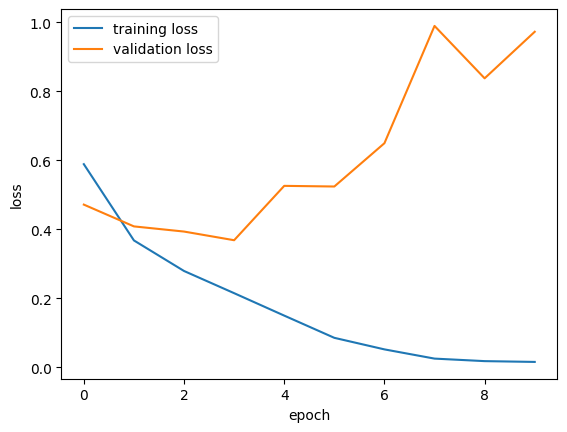

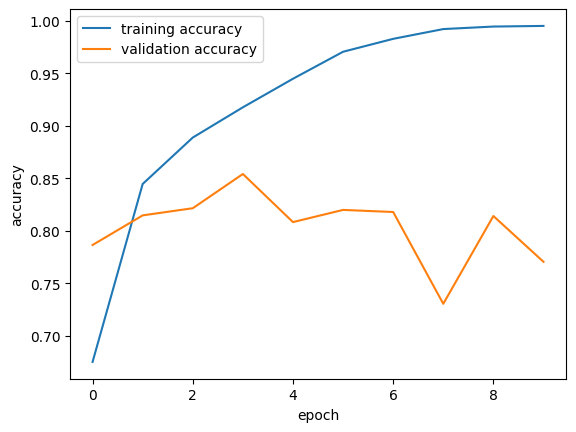

In [8]:
history_dict = history.history
print(history_dict.keys())

import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label = "training loss")
plt.plot(history_dict['val_loss'], label = "validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(history_dict['accuracy'], label = "training accuracy")
plt.plot(history_dict['val_accuracy'], label = "validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.layers import LSTM
model2 = Sequential()
model2.add(Embedding(10000, 32))
model2.add(LSTM(32))
model2.add(Dense(1, 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model2.compile('rmsprop', 'binary_crossentropy', ['acc'])

In [11]:
history = model2.fit(input_train,y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 61s 374ms/step - loss: 0.5801 - acc: 0.6933 - val_loss: 0.4654 - val_acc: 0.8214
Epoch 2/10
157/157 [==============================] - 60s 381ms/step - loss: 0.3601 - acc: 0.8532 - val_loss: 0.3301 - val_acc: 0.8614
Epoch 3/10
157/157 [==============================] - 56s 360ms/step - loss: 0.2785 - acc: 0.8928 - val_loss: 0.3310 - val_acc: 0.8700
Epoch 4/10
157/157 [==============================] - 58s 371ms/step - loss: 0.2374 - acc: 0.9102 - val_loss: 0.2947 - val_acc: 0.8768
Epoch 5/10
157/157 [==============================] - 57s 362ms/step - loss: 0.2077 - acc: 0.9230 - val_loss: 0.3253 - val_acc: 0.8862
Epoch 6/10
157/157 [==============================] - 58s 369ms/step - loss: 0.1827 - acc: 0.9330 - val_loss: 0.3881 - val_acc: 0.8434
Epoch 7/10
157/157 [==============================] - 59s 375ms/step - loss: 0.1676 - acc: 0.9404 - val_loss: 0.3176 - val_acc: 0.8834
Epoch 8/10
157/157 [==============================] - 5

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


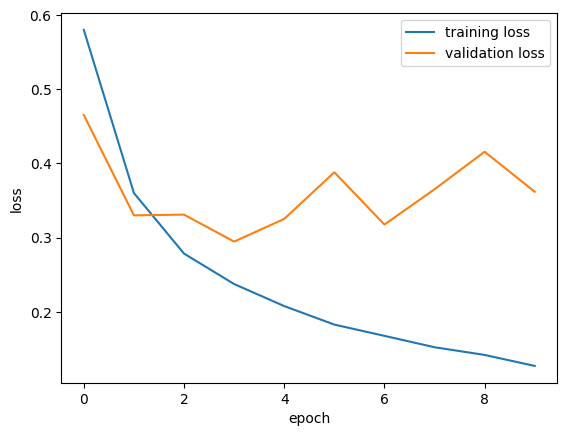

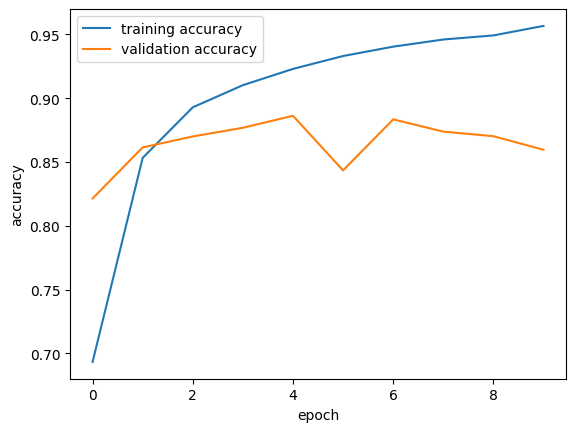

In [12]:
history_dict = history.history
print(history_dict.keys())

import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label = "training loss")
plt.plot(history_dict['val_loss'], label = "validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(history_dict['acc'], label = "training accuracy")
plt.plot(history_dict['val_acc'], label = "validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()